In [3]:
import numpy as np
import timecorr as tc
import seaborn as sns
import os
from matplotlib import pyplot as plt
from scipy.stats import wishart

%matplotlib inline

SMALL_SIZE = 18
MEDIUM_SIZE = 21
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
if not os.path.isdir('figs'):
    os.mkdir('figs')
figdir = 'figs'

In [58]:
def random_corrmat(K):
    x = np.random.randn(K, K)
    x /= np.max(np.abs(x))
    np.fill_diagonal(x, 1.)
    return x

In [59]:
def ramping_dataset(K, T):
    a = tc.mat2vec(random_corrmat(K))
    b = tc.mat2vec(random_corrmat(K))
    
    mu = np.linspace(0, 1, T)
    
    corrs = np.zeros([T, int((K**2 - K)/2 + K)])
    Y = np.zeros([T, K])
    
    for t in np.arange(T):
        corrs[t, :] = mu[t]*a + (1 - mu[t])*b
        Y[t, :] = np.random.multivariate_normal(mean=np.zeros([K]), cov=tc.vec2mat(corrs[t, :]))
    
    return Y, corrs

In [60]:
Y, corrs = ramping_dataset(10, 100)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  if sys.path[0] == '':


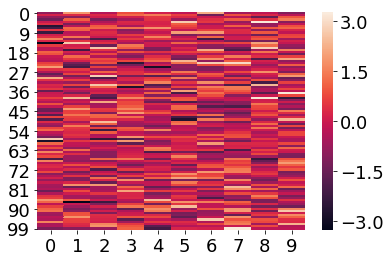

In [61]:
sns.heatmap(Y)

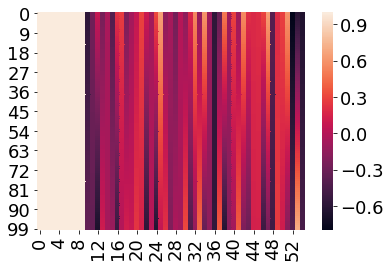

In [62]:
sns.heatmap(corrs)